
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    Diego Barreiro Pérez
</h3></center>

# ⚠️ Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python para esta práctica


Además de lo visto en la P0, y que ya usastéis en la P1, conviene repasar algunas de las funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.

Por ejemplo, puedes generar números aletorios de la siguiente forma utilizando el paquete `random`.

In [1]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)

6
0.7895994150794398


Puedes generar listas de números predefinidos o aleatorios y posteriormente barajarlos de manera aleatoria utilizando las **[list comprehensions](https://jakevdp.github.io/WhirlwindTourOfPython/11-list-comprehensions.html)** de Python y la funcion **shuffle** de la siguiente forma:

In [2]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)

vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 4, 3, 6, 7, 9, 2, 5, 1]
vector aleatorio  [5, 4, 2, 7, 9, 5, 2, 7, 3]
[3, 2, 5, 5, 7, 7, 2, 4, 9]


También podéis generar una lista de números aleatorios sin repetición en un rango determinado (permutación del rango).

In [3]:
print(random.sample(range(1,10), 9))

[1, 4, 2, 3, 6, 8, 7, 9, 5]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de la funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos algunos ejemplos de uso.

In [4]:
import math 

# número e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# también podéis hacer la potencia con la sintaxis básica de python con **
print(e**1)
print(e**2)

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, funciones del módulo `time` te permitirían obtener de manera aproximada tiempos de ejecución de secciones concretas de código.

In [5]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.09942841529846191 segundos ----


---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.

El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [6]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [7]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [8]:
g1 = Localizaciones(filename='./data/grafo8cidades.txt')
print(g1.distancia(0,1))
g2 = Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print(g2.distancia(0,1))
g3 = Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
119.30959564041359
68.81748609463234


Se define además, la función para visualizar las ciudades junto con el recorrido a realizar.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Se define además una función que dibuja en un gráfico las ciudades y los caminos
def visualizar(loc, sol, plt=plt):
    for i in range(0, loc.nciudades):
        ciudad = loc.tablaciudades[i][::-1]
        plt.plot(ciudad[0], ciudad[1], "or")
    for i in range(0, len(sol)-1):
        c1 = loc.tablaciudades[sol[i]][::-1]
        c2 = loc.tablaciudades[sol[i+1]][::-1]
        plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'k-', lw=2)
    try: plt.show()
    except AttributeError: pass

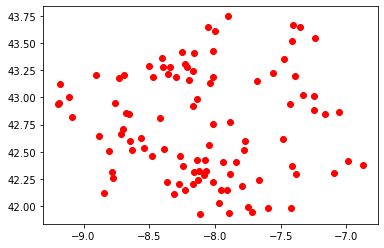

In [10]:
visualizar(g3, [])


## P2.1: Implementación básica de Búsqueda Tabú



En este apartado debes desarrollar una versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP) aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente. Igual que en la P1, consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia.

Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase el T1, diapositiva 49 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  **(permutaciones)  comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos.


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  Scand  a  partir  de  la  actual  Sact):  operador  de  intercambio. Con este operador, el número máximo de vecinos diferentes que se pued generar a partir de una solución dada es (todos los posibles intercambios) es:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

    donde L es la longitud de la solución.

- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    

- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **100 iteraciones consecutivas** sin que mejore la solución $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente por estar determinados intercambios prohibidos. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y se vacía la lista tabú.


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.


Para verificar tu implementación, **debes utilizar** el fichero de localizaciones de los 100 concellos gallegos **(*grafo100cidades.txt*).** Podéis utilizar como prueba para verificar que la implementaición es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km.

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

In [11]:
# REPRESENTACIÓN DE LAS SOLUCIONES
# En este diseño, a pesar de que siempre se empieza en la ciudad 0 y se acaba en la ciudad 0, se
# procede a almacenar todo el orden de las ciudades, incluyendo las iniciales y las finales, para
# facilitar ciertas funciones como coste.
# [0, 1, 2, 3, 4, 5, 6, 7, 0]

In [12]:
# FUNCIÓN DE COSTE
def coste(g, sol):
    s = 0
    for i in range(0, len(sol)-1):
        s += g.distancia(sol[i], sol[i+1])
    return s

# Se define además una función de coste de un vecino
# dado. Esto facilita el cálculo del coste de los
# vecinos, ya que en vez de realizar nciudades sumas,
# se realizan sólo 6 (los segmentos que cambian).
# Se permite pasar un extra para futuras modificaciones.
def coste_vecino(g, s_act, s_vec, c_act, mov, extra=0.0):
    segmentos = []
    # Primero se mira que segmentos han cambiado
    for m in mov:
        segmentos.append((m-1, m))
        segmentos.append((m, m+1))
    
    c = c_act
    # Y a continuación se restan los segmentos
    # de la solución original y se suman los del
    # vecino
    for segmento in segmentos:
        i, j = segmento
        c -= g.distancia(s_act[i], s_act[j])
        c += g.distancia(s_vec[i], s_vec[j])

    return c + extra

In [13]:
# SOLUCIÓN INICIAL
def genera_solucion_inicial(g):
    sol = [x for x in range(1, g.nciudades)]
    random.shuffle(sol)
    return [0] + sol + [0]

In [14]:
# VECINOS PERMITIDOS
def genera_vecinos(g, sact, tabu):
    # Se permiten todos los movimientos tal
    # que i sea mayor que  (ya que puede ser
    # simétrico)
    movs = []
    for i in range(1, g.nciudades):
        for j in range(i+1, g.nciudades):
            mov = (i, j)
            # Excepto los que son tabú
            if mov in tabu:
                continue
            movs.append(mov)

    vecinos = {}
    # Para cada movimiento permitido, se
    # genera el vecino correspondiente metíendolos
    # en un diccionario donde la clave es el
    # movimiento realizado
    for mov in movs:
        scand = sact.copy()
        i, j = mov
        scand[i], scand[j] = sact[j], sact[i]
        vecinos[mov] = scand
    return vecinos

In [15]:
# CONDICIÓN DE PARADA
DEFAULT_LIMITE = 10000

# TAMAÑO TABÚ
N = 100

# REINICIALIZACIÓN
R = 100

In [16]:
# BUSQUEDA TABÚ
from tqdm.notebook import tqdm

def busqueda_tabu(g, limite=DEFAULT_LIMITE, incluir_iteracion=False):
    # Se genera la solución inicial, la cual será la actual y la óptima inicialmente
    sol_inicial = genera_solucion_inicial(g)
    s_act, c_act = sol_inicial, coste(g, sol_inicial)
    iteracion = 0
    s_opt, c_opt = s_act, c_act
    
    # Se inicializa la lista de elementos tabú, y el contador para
    # su reinicialización
    tabu = []
    r = 0
    for i in tqdm(range(0, limite), leave=None):
        # Para la solución actual, se generan todos los vecinos posibles
        vecinos = genera_vecinos(g, s_act, tabu)
        # Y de todos los vecinos, se busca el que tenga un mejor coste
        mejor_mov, c_mejor_vecino, s_mejor_vecino = None, None, None
        for mov in vecinos.keys():
            vecino = vecinos[mov]
            # Para calcular el coste del vecino, no se usa la función
            # estándar de
            # c_vecino = coste(g, vecino)
            # ya que supone un tiempo de ejecución muy elevado. Se utiliza
            # la definida para ello a partir de la solución actual.
            c_vecino = coste_vecino(g, s_act, vecino, c_act, mov)
            if mejor_mov is None or c_vecino < c_mejor_vecino:
                mejor_mov = mov
                c_mejor_vecino = c_vecino
                s_mejor_vecino = vecino
        
        # La solución actual pasa a ser el mejor vecino y, además, el
        # movimiento que genere a este vecino entrará en la lista
        # tabú
        s_act, c_act = s_mejor_vecino, c_mejor_vecino
        if len(tabu) == N:
            # Si la lista tiene el límite de elementos, se elimina el
            # primero de ellos.
            tabu.pop(0)
        tabu.append(mejor_mov)
        
        # Si el coste de la solución actual es menor que el de la óptima,
        # esta solución actual pasa a ser la óptima, y se reinicia el
        # contador de reinicialización
        if c_act < c_opt:
            iteracion = i
            s_opt, c_opt = s_act, c_act
            r = 0
        else:
            r += 1
        
        # En caso de que el contador de reinicialización llegue al tope,
        # se reinicializa la lista tabú y se vuelve a la solución óptima
        if r == R:
            r = 0
            tabu = []
    
    return s_opt if not incluir_iteracion else (s_opt, iteracion)

  0%|          | 0/1000 [00:00<?, ?it/s]

1948.0143797964515


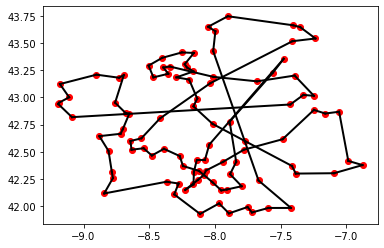

In [17]:
sol = busqueda_tabu(g3, limite=1000)
print(coste(g3, sol))
visualizar(g3, sol)

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar la media y desviación estándar de la mejor solución obtenida, el número de iteración en el que se alcanzó y el tiempo de ejecución del algoritmo

In [18]:
from tqdm.notebook import trange
from statistics import mean, stdev

def prueba(g, pruebas=10, limite=DEFAULT_LIMITE):
    resultados = []
    for i in tqdm(range(0, pruebas), desc='Pruebas', leave=None):
        start = time.time()
        sol, iteracion = busqueda_tabu(g, limite=limite, incluir_iteracion=True)
        end = time.time() - start
        c = coste(g, sol)
        resultados.append((sol, iteracion, c, end))

    mejor_solucion = None
    for r in resultados:
        if mejor_solucion is None or c < mejor_solucion[2]:
            mejor_solucion = r
    
    print("MEJOR SOLUCION: %f (I=%d, T=%f)" % (mejor_solucion[2], mejor_solucion[1], mejor_solucion[3]))
    visualizar(g, mejor_solucion[0])
    
    if pruebas > 1:
        print("MEDIA: %f" % mean(map(lambda r: r[2], resultados)))
        print("DESVIACIÓN ESTANDAR: %f" % stdev(map(lambda r: r[2], resultados), xbar=mejor_solucion[2]))

Pruebas:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1601.645533 (I=7889, T=419.630691)


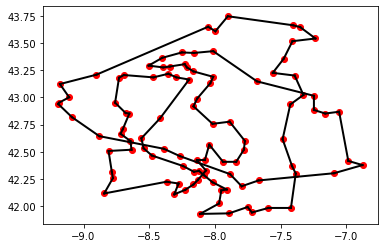

MEDIA: 1648.741190
DESVIACIÓN ESTANDAR: 112.395935


In [19]:
prueba(g3)

NOTA: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (No obligatorio)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localiszaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

NOTA: Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1632.382514 (I=3004, T=470.959916)


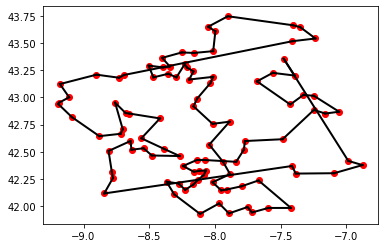

In [20]:
# SOLUCIÓN INICIAL
# Se prueba ahora a partir de la mejor solución posible por búsqueda
# local.

genera_solucion_inicial_legacy = genera_solucion_inicial

def genera_solucion_inicial_mejorada(g):
    sol = [0]
    for i in range(1, g.nciudades):
        mejor_punto, mejor_coste = None, None
        for i in range(1, g.nciudades):
            if i in sol:
                continue
            c = g.distancia(sol[len(sol) - 1], i)
            if not mejor_punto or c < mejor_coste:
                mejor_punto, mejor_coste = i, c
        sol.append(mejor_punto)
    return sol + [0]

genera_solucion_inicial = genera_solucion_inicial_mejorada
prueba(g3, pruebas=1)

genera_solucion_inicial = genera_solucion_inicial_legacy

Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1638.213527 (I=9921, T=667.544638)


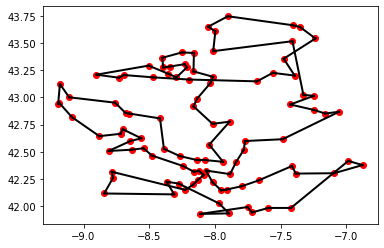

In [21]:
# ESTRATEGIA DE DIVERSIFICACIÓN
# Se define una matriz de frecuencias donde se almacena la cantidad de veces
# que se visita un par de ciudades. Esta frecuencia será un aditivo a la
# distancia entre ambas para tratar de buscar alternativas.

busqueda_tabu_legacy = busqueda_tabu

def busqueda_tabu_mejorada(g, limite=DEFAULT_LIMITE, incluir_iteracion=False):
    sol_inicial = genera_solucion_inicial(g)
    s_act, c_act = sol_inicial, coste(g, sol_inicial)
    iteracion = 0
    s_opt, c_opt = s_act, c_act
    
    d_max, d_min = None, None
    for i in range(0, g.nciudades):
        for j in range(i+1, g.nciudades):
            if d_max is None or d_max < g.distancia(i, j):
                d_max = g.distancia(i, j)
            if d_min is None or d_min > g.distancia(i, j):
                d_min = g.distancia(i, j)
    d_diff = d_max - d_min

    tabu = []
    frec, max_frec = [[0] * g.nciudades] * g.nciudades, 0
    for i in tqdm(range(0, limite), leave=None):
        vecinos = genera_vecinos(g, s_act, tabu)
        mejor_mov, c_mejor_vecino, s_mejor_vecino = None, None, None
        for mov in vecinos.keys():
            j, k = mov
            vecino = vecinos[mov]
            # Se calcula un aditivo extra a la distancia en función de las
            # veces en las que se ha visitado ese par de ciudades
            extra = 0 if max_frec == 0 else (d_diff * (frec[j][k] / max_frec))
            # Se calcula el coste del vecino
            c_vecino = coste_vecino(g, s_act, vecino, c_act, mov, extra)
            if mejor_mov is None or c_vecino < c_mejor_vecino:
                mejor_mov = mov
                c_mejor_vecino = c_vecino
                s_mejor_vecino = vecino
   
        # El movimiento se almacena en la tabla de frecuencias
        j, k = mejor_mov
        frec[j][k] += 1
        if frec[j][k] > max_frec:
            max_frec = frec[j][k]

        s_act, c_act = s_mejor_vecino, coste(g, s_mejor_vecino)
        if len(tabu) == N:
            tabu.pop(0)
        tabu.append(mejor_mov)

        if c_act < c_opt:
            iteracion = i
            s_opt, c_opt = s_act, c_act
    
    return s_opt if not incluir_iteracion else (s_opt, iteracion)

busqueda_tabu = busqueda_tabu_mejorada
prueba(g3, pruebas=1)

busqueda_tabu = busqueda_tabu_legacy

Pruebas:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

MEJOR SOLUCION: 1596.896583 (I=7162, T=506.638231)


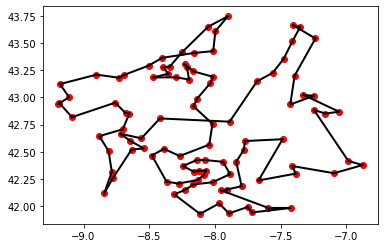

In [22]:
genera_solucion_inicial = genera_solucion_inicial_mejorada
busqueda_tabu = busqueda_tabu_mejorada

prueba(g3, pruebas=1)

busqueda_tabu = busqueda_tabu_legacy
genera_solucion_inicial = genera_solucion_inicial_legacy

---

# Respuestas a las preguntas

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

### P1.1 Especificación obligatoria

Esta primera parte se evalúa con 6 puntos. Para ello, es necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respetivamente. El conjunto de la implementación y las dos preguntas es lo que se evaluará en esta primera parte.

❓ **Pregunta 1** Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

**💬 Respuesta.** Está toda la implementación programada en el código en las celdas superiores. Cada celda tiene una función del algoritmo debidamente comentada y explicada.

❓ **Pregunta 2.** La parte experimental de la práctica consiste en realizar 10 ejecuciones diferentes de la implementación realizada y reportar la media y desviación estándar de la mejor solución obtenida, el número de iteración en el que se alcanzó y el tiempo de ejecución del algoritmo

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


**💬 Respuesta.** Se ha realizado las 10 pruebas con las 10.000 iteraciones. El resultado ha sido que la mejor solución está en torno a 1601, y se ha alcanzado en la iteración 7889 con un tiempo de casi 7 minutos.  
La media está en 1648, y la desviación estándar de 112.

Se puede ver en el grafo como son unos caminos "más o menos lógicos" en el sentido de que se visitan ciudades cercanas.

### Especificación optativa (mejoras)

Esta segunda parte es optativa y se evaluará sobre 4 puntos. Para ello es necesario que realicéis la implementación de las mejoras, mostréis el código en el que han sido implementadas y comentéis el porqué de estas mejoras y los resultados obtenidos.

❓ **Pregunta 3.** ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

**💬 Respuesta.** Se han hecho dos modificaciones: una solución inicial greedy, y una diversificación en la estrategia de búsqueda.

La primera de ellas, la inicialización de una solución greedy, se puede ver a simple vista como la distancia de una solución óptima se reduce entorno a 300 unidades. Además, en la representación, se puede ver también como se sigue un path hacia las ciudades más próximas no visitadas anteriormente.

En cuanto a la segunda, se introduce una matriz de frecuencias y las distancias de los vecinos se da un aditivo para evitar visitar las mismas todo el rato. Primero de todo, se aprecia como el algoritmo es más lento que la implementación de reinicialización. En cuanto al resultado, también se ve como se mejora entorno a 300, pero con la diferencia de que la solución óptima se aprecia en casi la última iteración, lo cual indica que el algoritmo si se metiesen más iteraciones es posible que encontrase otro path mejor.